# Ensemble, Pipline & RandomForest

In [1]:
## Importing libreries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
## There is some features that can not be 0, so let's replce those cells with mean values.

df["BMI"] = df["BMI"].replace(0, df["BMI"].mean())
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())

<AxesSubplot:>

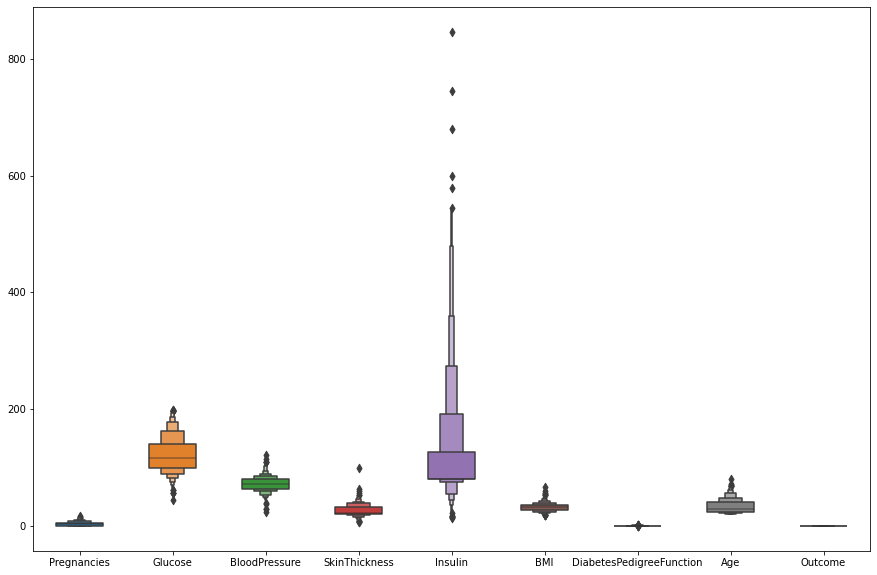

In [5]:
## Let's see if there is some outliers present or not

fig, ax = plt.subplots(figsize = (15, 10))
sns.boxenplot(data = df, width = 0.5, ax = ax)

In [6]:
## splitting dependent and independent columns

x = df.drop(columns= ["Outcome"])
y = df["Outcome"]

In [7]:
## splitting the data to train and test the model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25 , random_state=0)

In [8]:
from sklearn.impute import SimpleImputer     ## handling missing values  [This impute mean, mode and median from inputs]

## handling outliers  [For this we are not going to perform anything]

from sklearn.preprocessing import StandardScaler   ## Feature Scaling
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer     ## Automating the entier process

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
col_data = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

### Feature Engineering

In [12]:
num_pipline = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="median")),   ## Handling the missing values
        ("scaler", StandardScaler())  ## feature Scaling
    ]
)

In [13]:
preProcessor = ColumnTransformer([
    ("pipline", num_pipline, col_data)
])

In [14]:
x_train = preProcessor.fit_transform(x_train)
x_test = preProcessor.transform(x_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [16]:
## Automation model training process
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "svc": SVC()
}

In [17]:
from sklearn.metrics import accuracy_score


In [18]:
def evaluate_model(x_train, y_train, x_test, y_test, models):
    
    report = {}
    
    for i in range(len(models)):
        model = list(models.values())[i]
        #Train model
        model.fit(x_train, y_train)
        
        #predict Testing Data
        y_pred = model.predict(x_test)
        
        #Get Accuracy for test data prediciton
        test_model_score = accuracy_score(y_test, y_pred)
        
        report[list(models.keys())[i]] = test_model_score
    return report

In [19]:
evaluate_model(x_train, y_train, x_test, y_test, models)

{'Random Forest': 0.7916666666666666,
 'Decision Tree': 0.7864583333333334,
 'svc': 0.7552083333333334}

- Here the Random Forest model's accuracy value is much more higher than others, So, let's go with the random forest and do The HyperTuning.

In [21]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    "max_depth": [3, 4, 5, 10, None],
    "n_estimators": [100, 200, 300],
    "criterion": ["gini", "entropy"]
}
classifier = RandomForestClassifier()


In [22]:
cv = RandomizedSearchCV(classifier, param_distributions=params, cv = 5, scoring="accuracy", verbose=3)
cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.716 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.800 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.783 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.678 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.800 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.741 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.817 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.765 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.687 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.774 total time=   0.5s
[CV 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [23]:
cv.best_params_

{'n_estimators': 300, 'max_depth': 4, 'criterion': 'entropy'}

In [24]:
classifier = RandomForestClassifier( n_estimators=300, max_depth=4, criterion="entropy", oob_score=True )
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=300,
                       oob_score=True)

In [25]:
y_pr = classifier.predict(x_test)
accuracy_score(y_test, y_pr)


0.7604166666666666

## What the Hell...